# Notebook 2

Categorical data analysis


#### Table of contents:
* 

## Imports

In [1]:
import os
import re
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
# Gets src path 
src_path = os.path.dirname(os.getcwd())

# Adds src_path if it doesn't exist in sys.path (to access utils)
if os.path.exists(src_path) and src_path not in sys.path:
    sys.path.append(src_path)
    
import utils.data_tools as dt
import utils.viz_tools as vt

In [3]:
# Load datasets

df_main = pd.read_csv('../data/processed/main_data.csv')
df_bm = pd.read_csv('../data/processed/biomarker_data.csv')
df_adni = pd.read_csv('../data/processed/adni_data.csv')

## General overview

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient_ID                   2149 non-null   object 
 1   Age                          2149 non-null   int64  
 2   Gender                       2149 non-null   int64  
 3   Ethnicity                    2149 non-null   object 
 4   Education_lv                 1703 non-null   object 
 5   BMI                          2149 non-null   float64
 6   Smoking                      2149 non-null   int64  
 7   Alcohol_Consumption          2149 non-null   float64
 8   Physical_Activity            2149 non-null   float64
 9   Diet_Quality                 2149 non-null   float64
 10  Sleep_Quality                2149 non-null   float64
 11  Family_History_Alzheimers    2149 non-null   int64  
 12  CVD                          2149 non-null   int64  
 13  Diabetes          

In [5]:
# Correct 'None' interpretation in df_main['Education_lv']

df_main['Education_lv'] = df_main['Education_lv'].fillna('None')

In [6]:
# Check common columns in between datasets to see which can be compared in between them

main_bm = df_main.columns.intersection(df_bm.columns).to_list()
main_adni = df_main.columns.intersection(df_adni.columns).to_list()
bm_adni = df_bm.columns.intersection(df_adni.columns).to_list()
all_inters = df_main.columns.intersection(df_bm.columns.intersection(df_adni.columns)).to_list()

print('Main + biomarkers:', main_bm)
print('Main + adni:', main_adni)
print('Biomarkers + adni:', bm_adni)
print('All:', all_inters)

Main + biomarkers: ['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking', 'CVD', 'Diabetes', 'Hypertension', 'MMSE', 'DX']
Main + adni: ['Patient_ID', 'Age', 'Gender', 'Ethnicity', 'Smoking', 'CVD', 'Diabetes', 'Depression', 'Hypertension', 'MMSE', 'DX']
Biomarkers + adni: ['Patient_ID', 'Gender', 'Age', 'Education_yrs', 'Smoking', 'Hypertension', 'CVD', 'Diabetes', 'MMSE', 'MOCA', 'DX', 'Plasma_ptau181']
All: ['Patient_ID', 'Age', 'Gender', 'Smoking', 'CVD', 'Diabetes', 'Hypertension', 'MMSE', 'DX']


In [7]:
col_gen = ['Patient_ID', 'Age', 'Gender', 'Ethnicity', 'Education_lv', 'Education_yrs']
col_lifestyle = ['BMI', 'Smoking', 'Drinking', 'Alcohol_Consumption', 'Physical_Activity', 'Diet_Quality', 'Sleep_Quality']
col_clinical_history = ['APOE4', 'Family_History_Alzheimers', 'CVD', 'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'Head_Injury']
col_clinical_measurements = ['Systolic_BP', 'Diastolic_BP', 'Cholesterol_Total', 'Cholesterol_LDL', 'Cholesterol_HDL', 'Cholesterol_Triglycerides', 'Plasma_GFAP', 'Plasma_NfL', 'Plasma_ptau181']
col_as = ['MMSE', 'MOCA', 'Functional_Assessment', 'ADL']

## Categorical variables

#### main_data

In [8]:
main_classification = dt.classify_by_cardinality(df_main)
column_selection = main_classification.loc[main_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_main = column_selection.index.to_list()

new_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Education_lv': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'Family_History_Alzheimers': ['No', 'Yes'],
    'CVD': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'Head_Injury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'Memory_Complaints': ['No', 'Yes'],
    'Behavioral_Problems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'Personality_Changes': ['No', 'Yes'],
    'Difficulty_Completing_Tasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes'],
    'DX': ['No AD', 'AD']
}

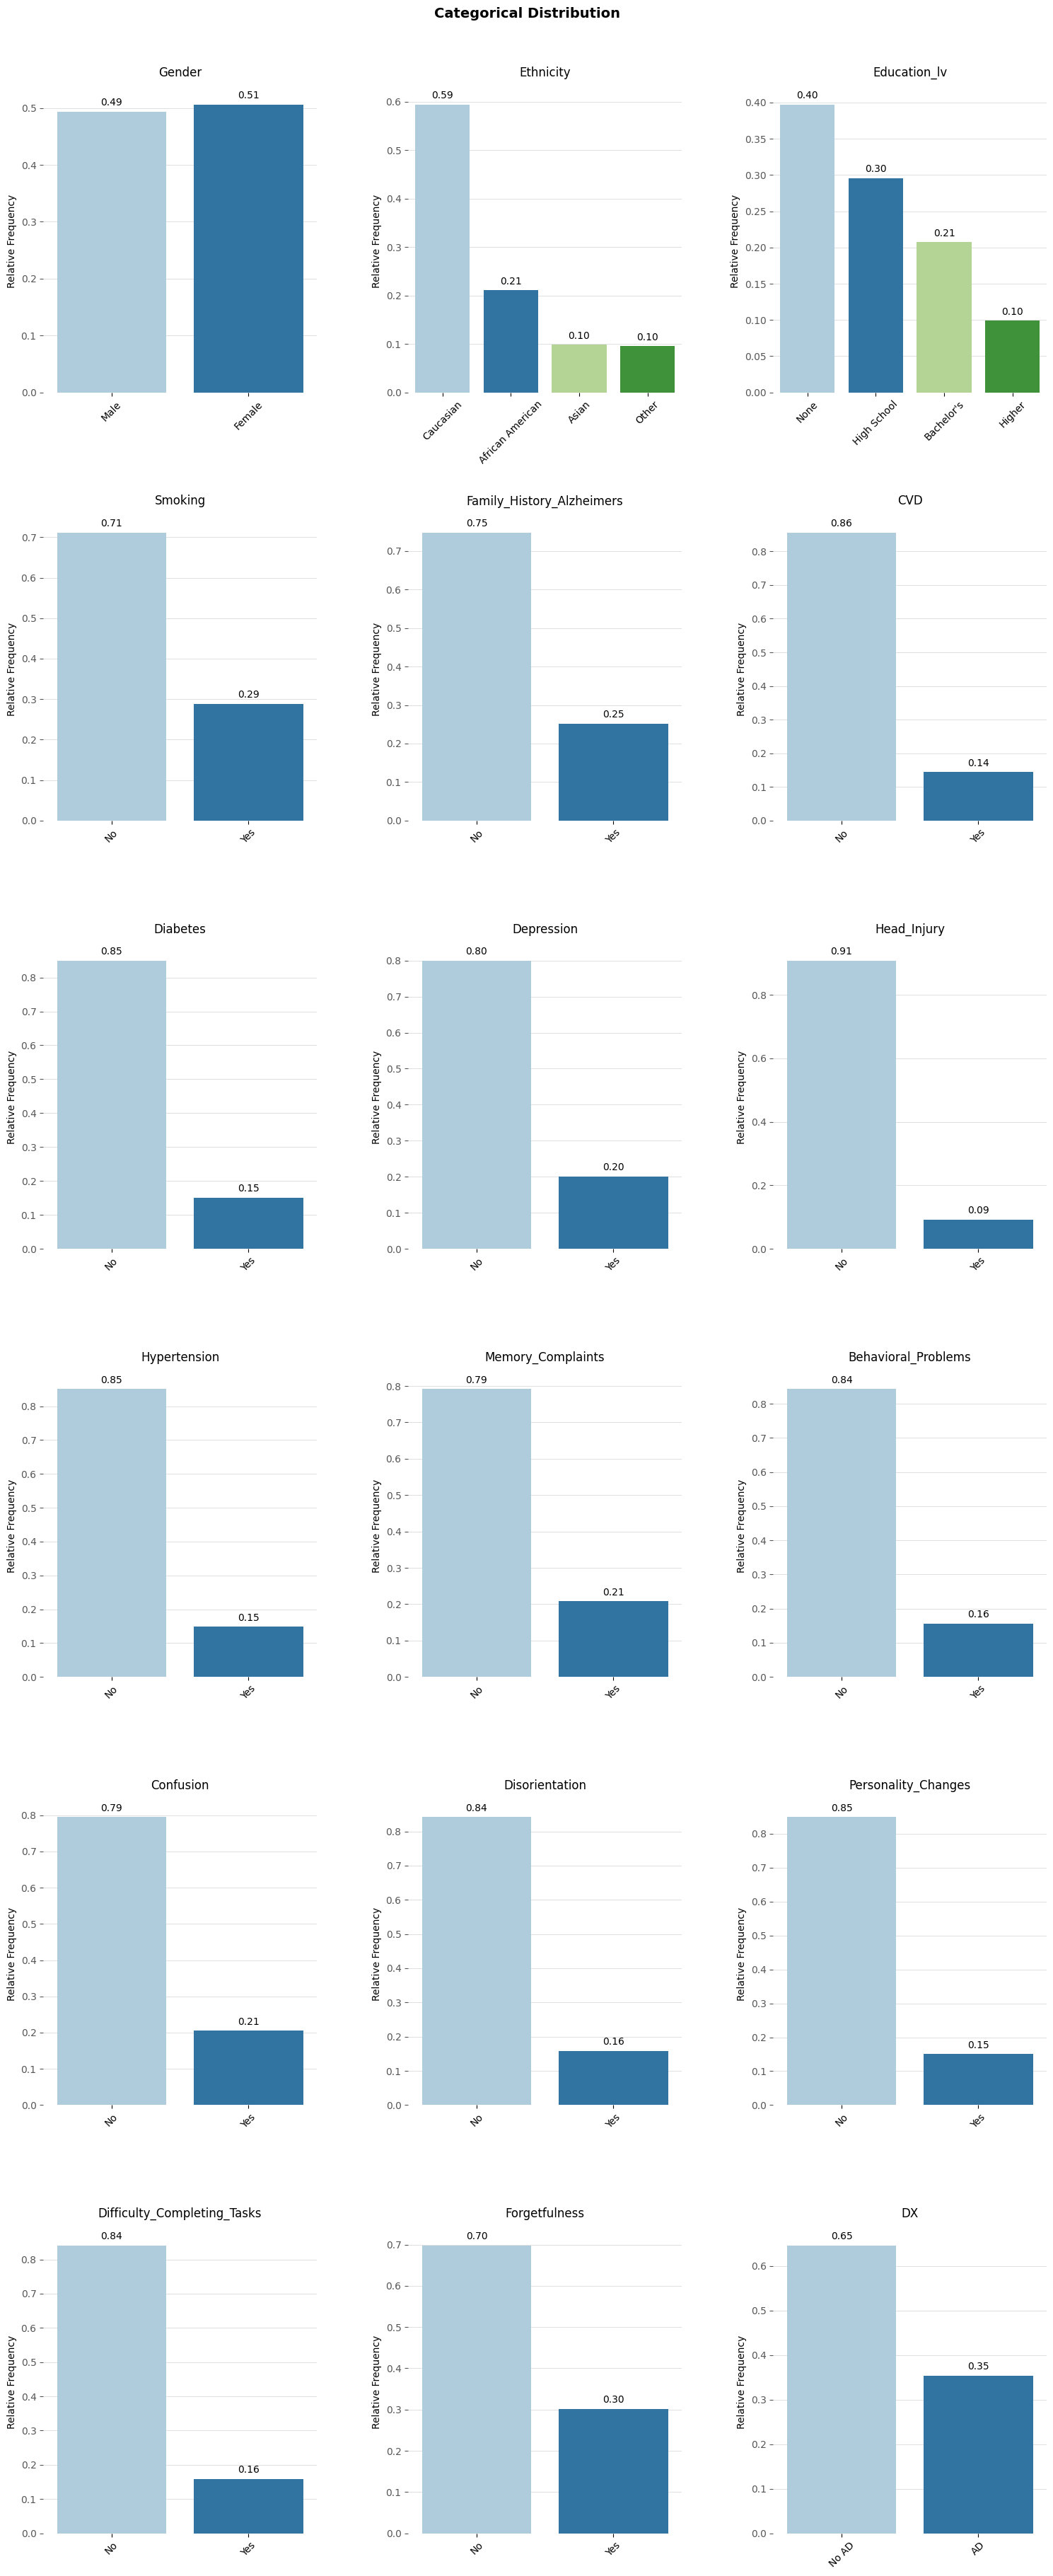

In [9]:
vt.plot_categorical_distribution(df_main, categorical_main, custom_labels = new_labels, relative = True, show_values=True, palette = 'Paired')

#### biomarker_data

In [14]:
bm_classification = dt.classify_by_cardinality(df_bm)
column_selection = bm_classification.loc[bm_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_bm = column_selection.index.to_list()

new_labels = {
    'Gender': ['Male', 'Female'],
    'Smoking': ['No', 'Yes'],
    'Drinking': ['No', 'Yes'],
    'CVD': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'DX': ['CU', 'MCI', 'AD']
}

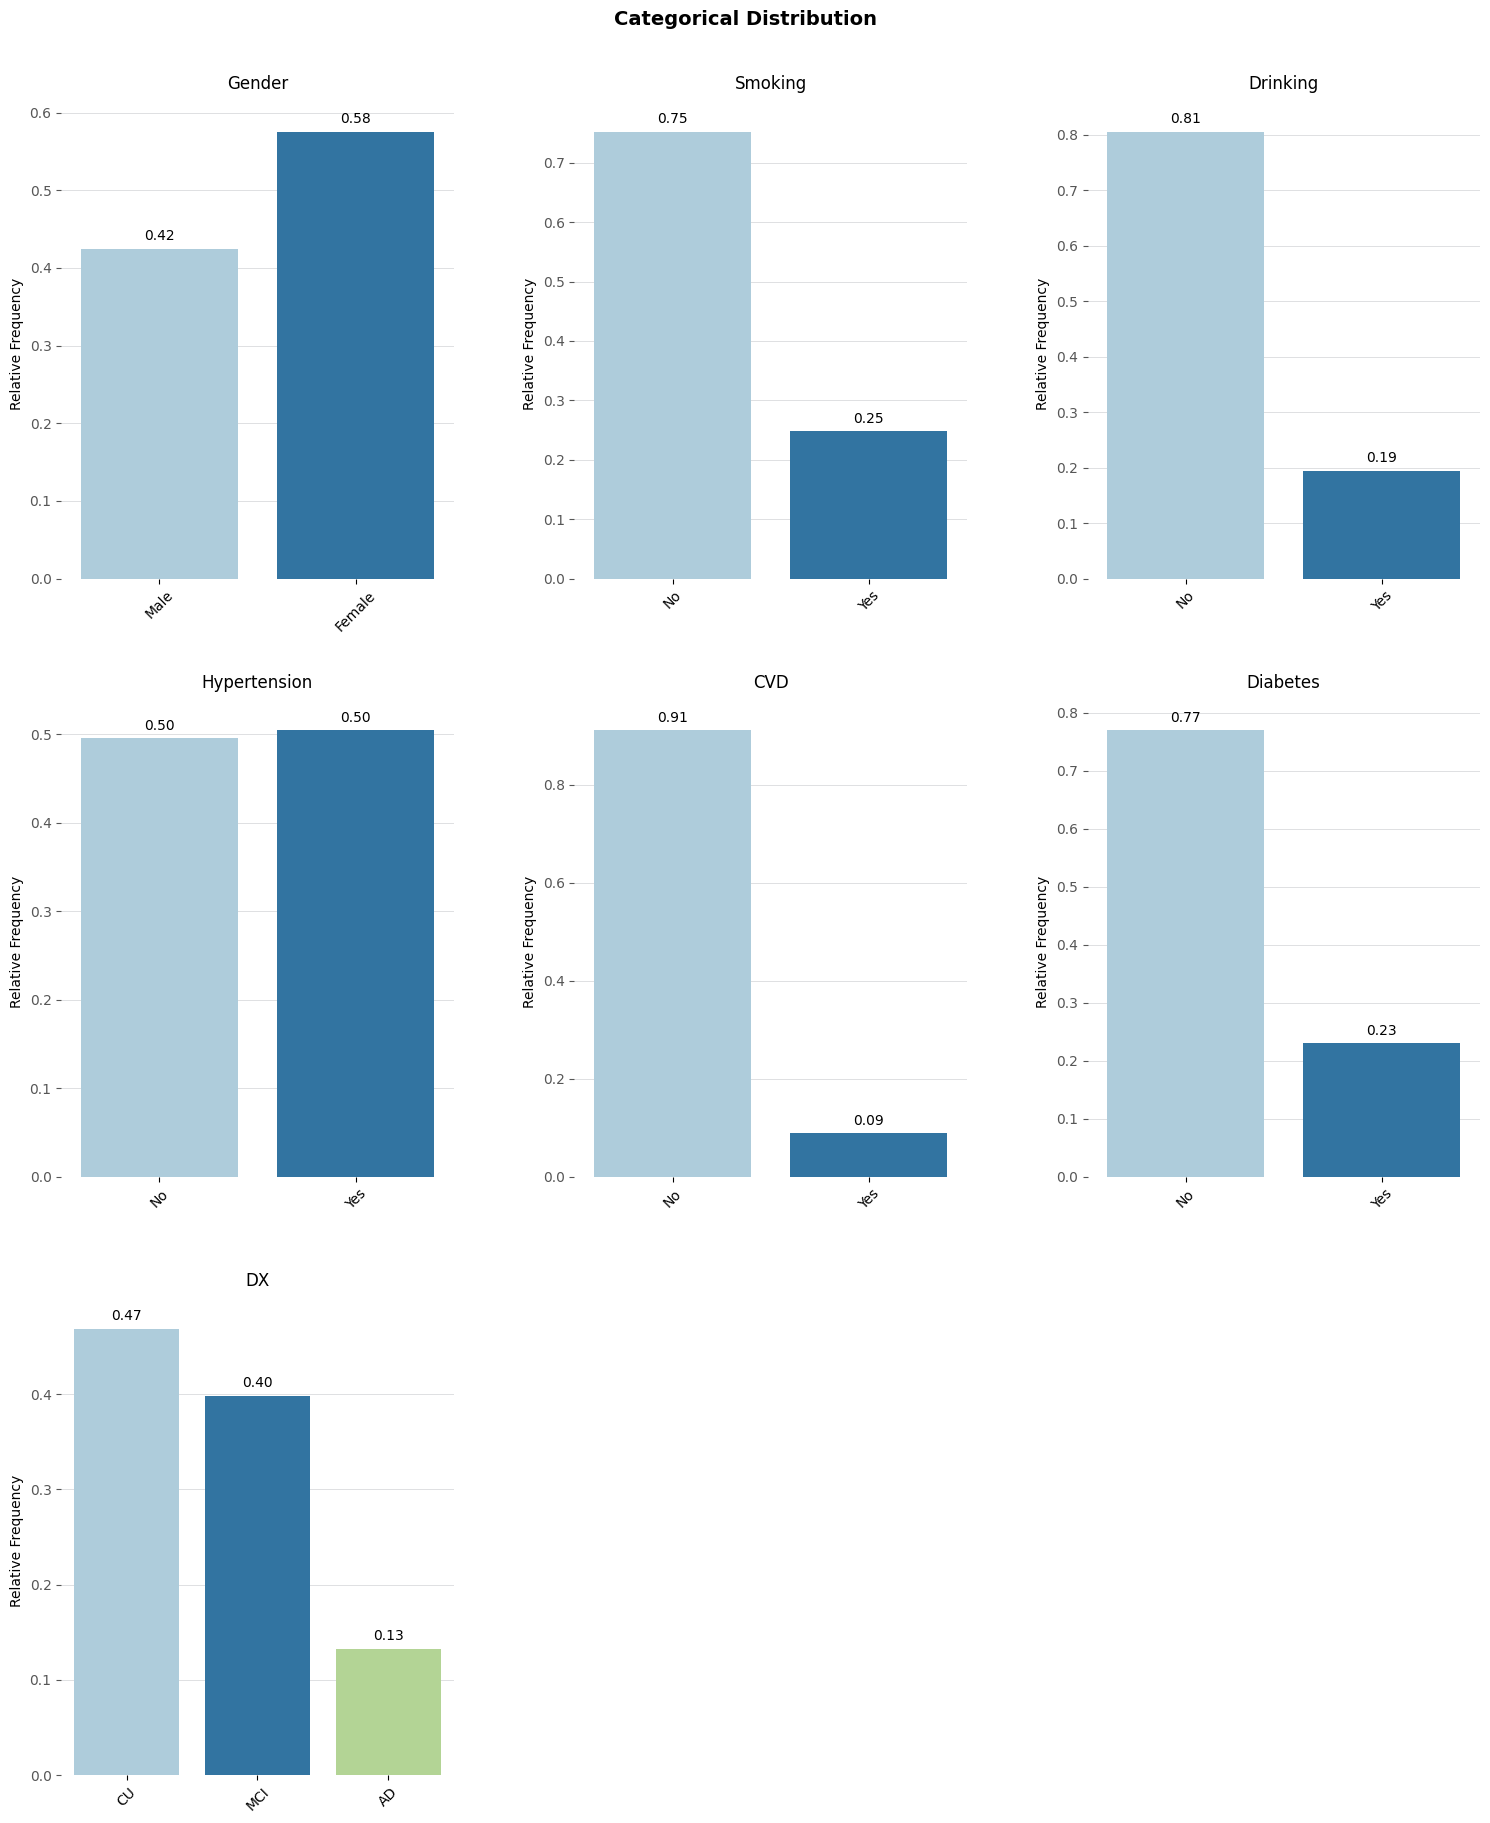

In [15]:
vt.plot_categorical_distribution(df_bm, categorical_bm, custom_labels = new_labels, relative = True, show_values=True, palette = 'Paired')

#### adni_data

In [20]:
adni_classification = dt.classify_by_cardinality(df_adni)
column_selection = adni_classification.loc[adni_classification['Suggested Type'].isin(['Binary', 'Categorical'])]
categorical_adni = column_selection.index.to_list()
categorical_adni

new_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Smoking': ['No', 'Yes'],
    'CVD': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'Stroke': ['No', 'Yes'],
    'APOE4': ['No APOE4', 'Heterozygous', 'Homozygous'],
    'DX': ['CU', 'MCI', 'AD'],
    'Group': ['CU-', 'MCI-', 'MCI+', 'AD', 'CU+']
}

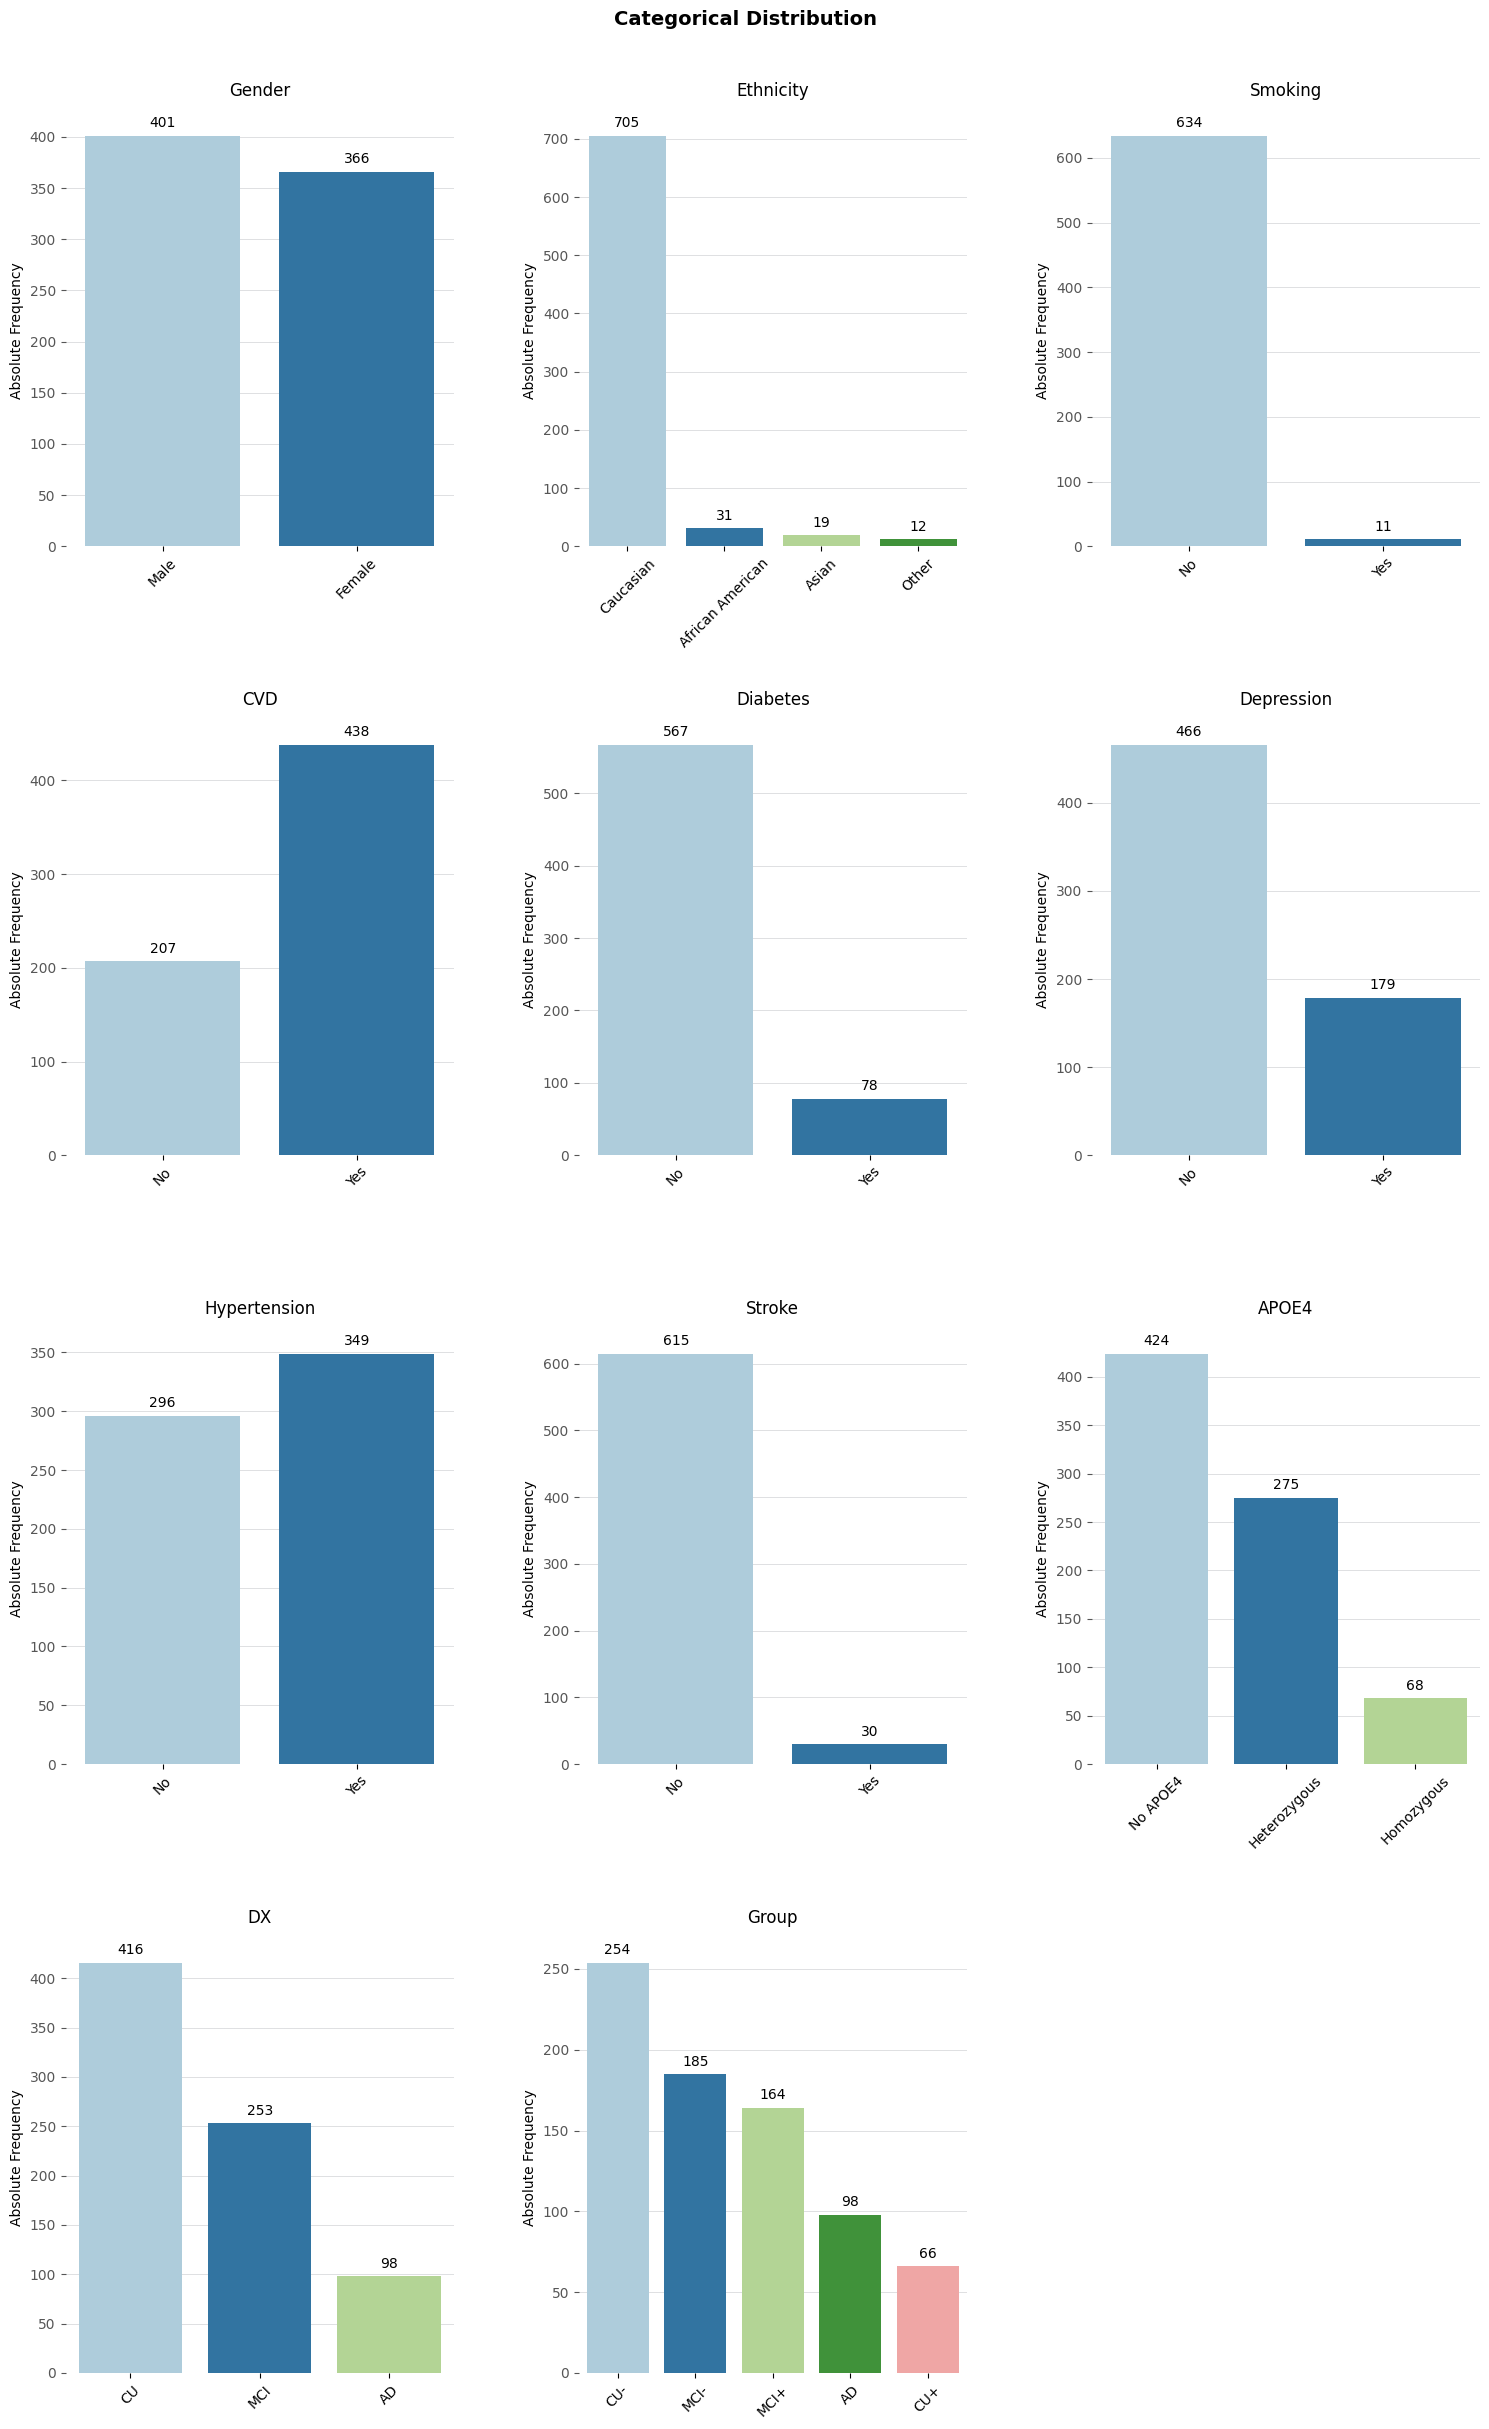

In [21]:
vt.plot_categorical_distribution(df_adni, categorical_adni, custom_labels = new_labels, show_values=True, palette = 'Paired')